<h1>HIV-1 protease cleavage Data Set</h1>
<p style="text-align: right"><q><strong>Author:</strong> Danilo R. Santos <strong>E-mail: </strong><a href="">danilo_santosrs@hotmail.com</a></q></p>

In [1]:
import pandas as pd

import numpy as np

from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_ohe = pd.read_csv('hpcdata_ohe_coded.csv', engine='c')
df_ohe.head()

,ohe_seq11,ohe_seq12,ohe_seq13,ohe_seq14,ohe_seq15,ohe_seq16,ohe_seq17,ohe_seq18,ohe_seq19,ohe_seq110,...,ohe_seq812,ohe_seq813,ohe_seq814,ohe_seq815,ohe_seq816,ohe_seq817,ohe_seq818,ohe_seq819,ohe_seq820,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
# Cria uma matriz de dados para plotagem
data_plot = {}

# Separa os dados de treinamento e teste
X = df_ohe[[item for item in df_ohe.columns if item != 'target']]
y = df_ohe['target']

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle=True, stratify=y)

In [7]:
# Testa o modelo de Decision Tree
model_dt = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter='best',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.,
                                  max_features=None,
                                  random_state = 100,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0,
                                  #min_impurity_split=0,
                                  class_weight=None,
                                  presort=False)

mdt_fit = model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_dt, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

cv_results = cross_validate(model_dt, X, y, scoring=['accuracy', 'brier_score_loss'],
                            cv=10, n_jobs=-1, verbose=1)

data_plot.update({1:['Decision Tree', mac, mcr, mas, mcm, msm, mss]})

Accuracy: 0.8877086494688923

Classifcation Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1569
           1       0.72      0.75      0.73       408

    accuracy                           0.89      1977
   macro avg       0.83      0.84      0.83      1977
weighted avg       0.89      0.89      0.89      1977


Accuracy Score
0.8877086494688923

Confusion Matrix
[[1450  119]
 [ 103  305]]
[0.83156297 0.81790592 0.81942337 0.82094082 0.91957511 0.92716237
 0.95144158 0.94992413 0.91805766 0.94385432]
Accuracy: 0.89 (+/- 0.11)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.9s finished


In [8]:
# Testa o modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators= 160,
                                  criterion='entropy',
                                  max_features = 'auto',
                                  max_depth = None,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  min_weight_fraction_leaf = 0,
                                  max_leaf_nodes = None,
                                  min_impurity_decrease = 0,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state = 100,
                                  verbose = 1,
                                  warm_start = False,
                                  class_weight = None)
mrf_fit = model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

cv_results = cross_validate(model_rf, X, y, scoring=['accuracy', 'brier_score_loss'],
                            cv=10, n_jobs=-1, verbose=1)

data_plot.update({2:['Random Forest', mac, mcr, mas, mcm, msm, mss]})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


Accuracy: 0.9215983813859383

Classifcation Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1569
           1       0.90      0.70      0.79       408

    accuracy                           0.92      1977
   macro avg       0.91      0.84      0.87      1977
weighted avg       0.92      0.92      0.92      1977


Accuracy Score
0.9215983813859383

Confusion Matrix
[[1536   33]
 [ 122  286]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[0.84066768 0.82852807 0.83459788 0.84218513 0.95599393 0.98027314
 0.98634294 0.97268589 0.98179059 0.96813354]
Accuracy: 0.92 (+/- 0.14)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.5s finished


In [9]:
# Testa o modelo SVM/SVC
model_svc = SVC(C=1.0,
                kernel='rbf', 
                degree=3, 
                gamma='auto', 
                coef0=0.0, 
                shrinking=True, 
                probability=True, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=True, 
                max_iter=-1, 
                decision_function_shape='ovr', 
                random_state=100)

mss_fit = model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_svc, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

cv_results = cross_validate(model_svc, X, y, scoring=['accuracy', 'brier_score_loss'],
                            cv=10, n_jobs=-1, verbose=1)

data_plot.update({3:['SVM/SVC', mac, mcr, mas, mcm, msm, mss]})

[LibSVM]Accuracy: 0.9084471421345472

Classifcation Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1569
           1       0.90      0.63      0.74       408

    accuracy                           0.91      1977
   macro avg       0.90      0.80      0.84      1977
weighted avg       0.91      0.91      0.90      1977


Accuracy Score
0.9084471421345472

Confusion Matrix
[[1540   29]
 [ 152  256]]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.82701062 0.83611533 0.85887709 0.83763278 0.93626707 0.97572079
 0.94840668 0.89377845 0.96965099 0.93778452]
Accuracy: 0.90 (+/- 0.11)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


In [10]:
# Testa o modelo Linear SVC
model_lss = LinearSVC(penalty='l2',
                      loss='squared_hinge',
                      dual = False, 
                      tol=0.0001, 
                      C=1.0, 
                      multi_class='ovr', 
                      fit_intercept=True, 
                      intercept_scaling=1, 
                      class_weight = 'balanced', 
                      verbose = 1, 
                      random_state = 100, 
                      max_iter=1000)

mls_fit = model_lss.fit(X_train, y_train)
y_pred = model_lss.predict(X_test)

mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_lss, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

data_plot.update({4:['SVM/LinearSVM', mac, mcr, mas, mcm, msm, mss]})

[LibLinear]Accuracy: 0.9089529590288316

Classifcation Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1569
           1       0.71      0.94      0.81       408

    accuracy                           0.91      1977
   macro avg       0.85      0.92      0.87      1977
weighted avg       0.93      0.91      0.91      1977


Accuracy Score
0.9089529590288316

Confusion Matrix
[[1415  154]
 [  26  382]]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][0.89377845 0.8801214  0.86039454 0.85735964 0.91957511 0.93474962
 0.95295903 0.8801214  0.92261002 0.90288316]
Accuracy: 0.90 (+/- 0.06)


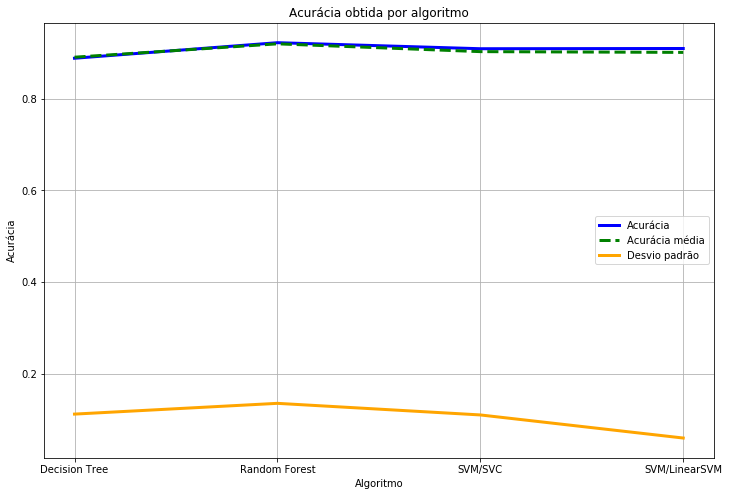

In [11]:
algoritmos = []
accuracy = []
accuracy_mean = []
accuracy_std = []
for k, v in data_plot.items():
    algoritmos.append(v[0])
    accuracy.append(v[1])
    accuracy_mean.append(v[5])
    accuracy_std.append(v[6])
    
plt.figure(figsize=(12,8))
plt.plot(algoritmos, accuracy, color='blue', linewidth=3.0, label='Acurácia');
plt.plot(algoritmos, accuracy_mean, 'k--', color='green', linewidth=3.0, label='Acurácia média');
plt.plot(algoritmos, accuracy_std, color='orange', linewidth=3.0, label='Desvio padrão');
plt.title('Acurácia obtida por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.grid(True)
plt.legend();

['Decision Tree', 'Random Forest', 'SVM/SVC', 'SVM/LinearSVM']
[1450, 1536, 1540, 1415]
[305, 286, 256, 382]
[103, 122, 152, 26]
[305, 286, 256, 382]
[0.24406665544521125, 0.2585423329405824, 0.2592156202659485, 0.23817539134825788]
[0.2481692432872254, 0.23270951993490643, 0.2082994304312449, 0.31082180634662326]
[0.2555831265508685, 0.3027295285359802, 0.3771712158808933, 0.06451612903225806]
[0.2471692432872254, 0.23170951993490643, 0.2072994304312449, 0.30982180634662326]


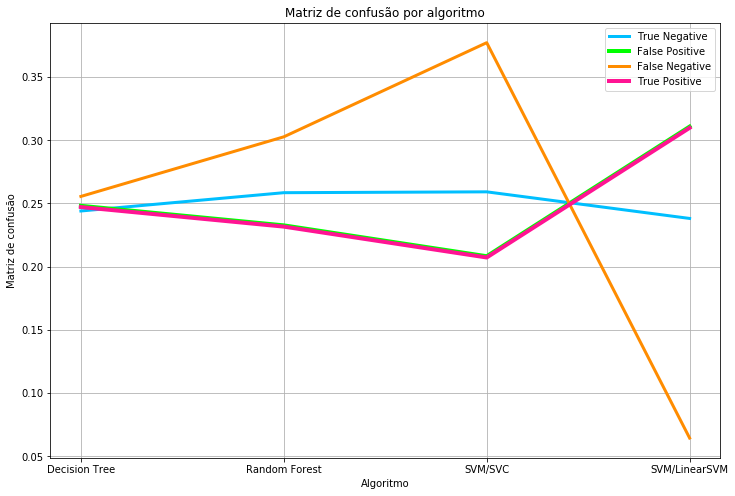

In [14]:
algoritmos = []
tn = []
fp = []
fn = []
tp = []
for k, v in data_plot.items():
    algoritmos.append(v[0])
    tn.append(v[4][0][0])
    fp.append(v[4][1][1])
    fn.append(v[4][1][0])
    tp.append(v[4][1][1])

print(algoritmos)
print(tn)
print(fp)
print(fn)
print(tp)

def scalable_data_one(data):
    np_data = np.array(data)
    data_mean = np_data.mean()
    return [(item/data_mean) for item in data]

def scalable_data(data):
    np_data = np.array(data)
    data_sum = np_data.sum()
    return [(item/data_sum) for item in data]

def scalable_data_two(data):
    np_data = np.array(data)
    data_sum = np_data.sum()
    return [((item/data_sum) - 0.001) for item in data]

tn = scalable_data(tn)
fp = scalable_data(fp)
fn = scalable_data(fn)
tp = scalable_data_two(tp)

print(tn)
print(fp)
print(fn)
print(tp)

plt.figure(figsize=(12,8))
plt.plot(algoritmos, tn, color='#00BFFF', linewidth=3.0, label='True Negative')
plt.plot(algoritmos, fp, color='#00FF00', linewidth=4.0, label='False Positive')
plt.plot(algoritmos, fn, color='#FF8C00', linewidth=3.0, label='False Negative')
plt.plot(algoritmos, tp, color='#FF1493', linewidth=4.0, label='True Positive')
plt.title('Matriz de confusão por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Matriz de confusão')
plt.grid(True)
plt.legend();

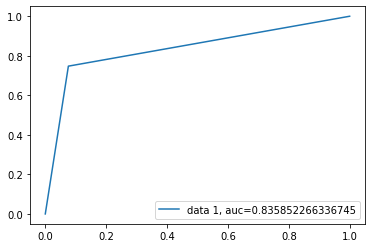

In [16]:
# AUC Curve
y_pred_proba = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.9s finished


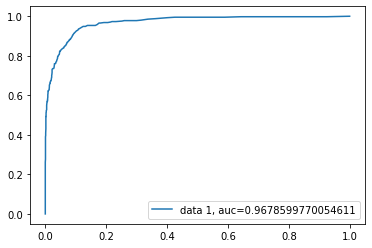

In [17]:
# AUC Curve
y_pred_proba = model_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

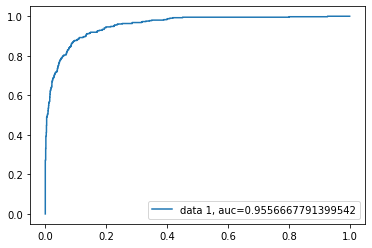

In [18]:
# AUC Curve
y_pred_proba = model_svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


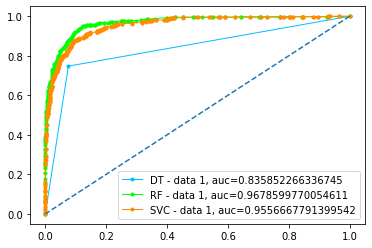

In [26]:
y_pred_proba = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="DT - data 1, auc="+str(auc), color='#00BFFF', linewidth=1.0, marker='.')

y_pred_proba = model_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RF - data 1, auc="+str(auc), color='#00FF00', linewidth=1.0, marker='.')

y_pred_proba = model_svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SVC - data 1, auc="+str(auc), color='#FF8C00', linewidth=1.0, marker='.')

plt.plot([1,0], [1,0], linestyle='--')

plt.legend(loc=4)
plt.show()

f1=0.733 auc=0.759 ap=0.590


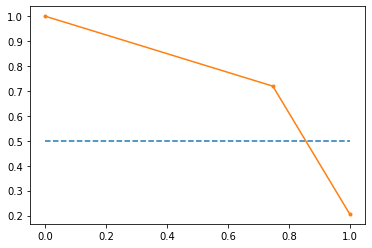

In [33]:
# predict probabilities
probs = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model_dt.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = metrics.f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = metrics.auc(recall, precision)
# calculate average precision score
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

f1=0.733 auc=0.759 ap=0.590


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


f1=0.787 auc=0.910 ap=0.909
f1=0.739 auc=0.880 ap=0.880


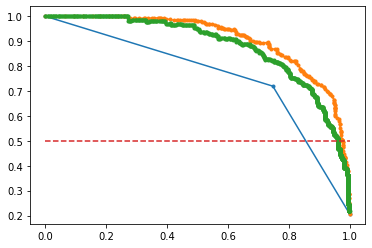

In [34]:
probs = model_dt.predict_proba(X_test)
probs = probs[:, 1]
yhat = model_dt.predict(X_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
f1 = metrics.f1_score(y_test, yhat)
auc = metrics.auc(recall, precision)
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot(recall, precision, marker='.')

probs = model_rf.predict_proba(X_test)
probs = probs[:, 1]
yhat = model_rf.predict(X_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
f1 = metrics.f1_score(y_test, yhat)
auc = metrics.auc(recall, precision)
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot(recall, precision, marker='.')

probs = model_svc.predict_proba(X_test)
probs = probs[:, 1]
yhat = model_svc.predict(X_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
f1 = metrics.f1_score(y_test, yhat)
auc = metrics.auc(recall, precision)
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot(recall, precision, marker='.')

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


f1=0.733 auc=0.759 ap=0.590


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


f1=0.787 auc=0.910 ap=0.909
f1=0.739 auc=0.880 ap=0.880


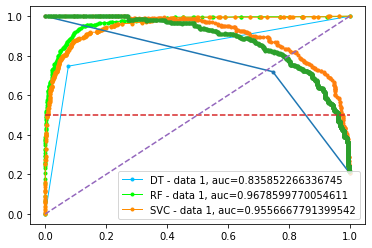

In [35]:
y_pred_proba = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="DT - data 1, auc="+str(auc), color='#00BFFF', linewidth=1.0, marker='.')

y_pred_proba = model_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RF - data 1, auc="+str(auc), color='#00FF00', linewidth=1.0, marker='.')

y_pred_proba = model_svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SVC - data 1, auc="+str(auc), color='#FF8C00', linewidth=1.0, marker='.')

probs = model_dt.predict_proba(X_test)
probs = probs[:, 1]
yhat = model_dt.predict(X_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
f1 = metrics.f1_score(y_test, yhat)
auc = metrics.auc(recall, precision)
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot(recall, precision, marker='.')

probs = model_rf.predict_proba(X_test)
probs = probs[:, 1]
yhat = model_rf.predict(X_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
f1 = metrics.f1_score(y_test, yhat)
auc = metrics.auc(recall, precision)
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot(recall, precision, marker='.')

probs = model_svc.predict_proba(X_test)
probs = probs[:, 1]
yhat = model_svc.predict(X_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
f1 = metrics.f1_score(y_test, yhat)
auc = metrics.auc(recall, precision)
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
plt.plot(recall, precision, marker='.')

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot([1,0], [1,0], linestyle='--')

plt.legend(loc=4)
plt.show()